# [CIVENG190] Notebook 5: Wastewater Monitoring

<br>

**Estimated Time:** ~60 minutes <br> 
**Notebook Developed By:** Skye Pickett, Abigail Yu, Lori Khashaki, and Vishali Vallioor <br>

**This notebook will put together everything you've learned so far and include new ways of interpreting data to understand the presence of COVID-19 in wastewater.**

### Learning Outcomes

In this notebook, you will learn about:
- How to work with `.shp` files
- Interpreting geographical visualizations
- Exploring real-world raw data sources 
- Applying Human Contexts and Ethics in practice

### Table of Contents
   
1. [Introduction](#0) <br>
1. [Mapping Viral Loads in Wastewater Treatment Plants](#1) <br>
1. [Wastewater Research by Dr. Kantor](#2) <br>
1. [COVID-19 Data](#3) <br>
1. [Pollution Burden Maps](#4) <br>
1. [Conclusion](#5) <br>
1. [Submission](#6)<br>
1. [Explore Data Science Opportunities](#7)<br>
1. [Feedback Form](#8)<br>

-------------------------------------------------------------------

In [24]:
# Run this cell
import numpy as np
import pandas as pd
import folium
import ipywidgets as widgets
from IPython import display
#from IPython.display import display, HTML
#import datascience
import matplotlib as pm
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
print("All necessary packages have been imported!")

All necessary packages have been imported!


# 1. Introduction <a id='0'></a>

## 1.1 Introduction to the Data Sources

This notebook has a great deal of variety in terms of data sources! Let's dive into what data sources each section of this notebook. 

#### Datasets in Section 2 
We will be analyzing data from three different communities in the Bay Area! We will be plotting each of these bay area communities using [`geopandas`](https://geopandas.org/en/stable/getting_started/introduction.html). The corresponding data is found in the `datasets/wastewater_merge` folder. The dataset contains data about three cities in the Bay Area: Alameda, Las Gallinas, and Novato.   



#### Datasets in Section 3 

For this section, we will be using a dataset called `kantor_data.csv`. This dataset is from Dr. Rose Kantor's research and contains information about counties and their respective attributes such as population and SARS-Co-V-2 RNA found in wastewater samples. 

    
#### Datasets in Section 4 
In order to understand COVID-19 cases in the San Francisco area, we are going to use publically available data from [sf.gov](https://sf.gov/) for our analysis. 

    
#### Datasets in Section 5 
To help contextualize the viral wastewater and COVID-19 case data, we will be exploring data from [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40) which is provided by the Office of Environmental Health Hazard Assessment (OEHHA). CalEnviroScreen is helpful for our analysis as it allows us to identify California communities that are disproportionately burdened by different sources of pollution. 
    

## 1.2 Context

In this notebook, we want to understand the viral loads in wastewater treatment plans, by using `.shp` files. Next, we deepen our analysis and will try to understand the amount of SARS-Co-V-2 RNA there is in wastewater. After, we will connect these with how many COVID-19 cases were actually reported by the government. And finally, we will try to understand how different demographics such as poverty correlate with COVID-19 exposure. 
    


## 1.3 Goals of this notebook

**Some of the learning objectives for this notebook include:**

* Learn about importing, understanding, manipulating, and visualizing `.shp` files and using the geopandas library
* Calculating statistics based on real-world data used in research 
* Using publically available government data to further support analysis from independently conducted research 
* Explore data sources and learn how to use their characteristics for deeper analysis


-------------------------------------------------------------------

# 2. Mapping Viral Loads in Wastewater Treatment Plants <a id='1'></a>



### 2.1 Introduction to the data and *.shp* files


In order to read in our data, let's first understand what kind of file it is.

A `.shp` file, or shapefile, is data in the format of a geospatial vector used for geographic information system (GIS) software. It often stores the geometric location and attributes information of certain geographic features, which can be represented by points, lines, or polygons (areas) as we will see below.

Let's read in the dataset corresponding to the `.shp` files we're using. This dataset shows some attributes of the concentration of SARS-CoV-2 RNA in the wastewater in units of **gene copies per milliliter** for the `Raw_mean`, `Raw_med`, `Raw_STDEV`, `Raw_10th`, and `Raw_90th` columns.

In [32]:
covid_wastewater = gpd.read_file('datasets/wastewater_merge/NB5_Merge.shp')
covid_wastewater.head()

,OBJECTID,SHAPE_Leng,SHAPE_Area,layer,Raw_mean,Raw_med,Raw_STDEV,Raw_10th,Raw_90th,geometry
0,0,NaN,NaN,EBMUD Influent (Alameda),98.786012,34.288305,156.825380,10.474521,372.003547,"POLYGON ((-122.29719 37.85875, -122.29748 37.8..."
1,1,44712.627543,2.077880e+07,Las_Gallinas_Service_Area,83.121015,31.467199,133.218725,4.023709,278.747068,"POLYGON ((-122.54294 38.04272, -122.54287 38.0..."
2,2,6396.928381,1.914651e+06,Las_Gallinas_Service_Area,83.121015,31.467199,133.218725,4.023709,278.747068,"POLYGON ((-122.53431 38.03334, -122.53515 38.0..."
3,3,8463.168357,1.825581e+06,Las_Gallinas_Service_Area,83.121015,31.467199,133.218725,4.023709,278.747068,"POLYGON ((-122.51903 38.02429, -122.51896 38.0..."
4,4,235.745054,3.247817e+03,Las_Gallinas_Service_Area,83.121015,31.467199,133.218725,4.023709,278.747068,"POLYGON ((-122.59867 38.03685, -122.59867 38.0..."


_Note: The "geometry" column in this dataset corresponds to the geospatial graphs you see below!_

### 2.2 Reading maps

Map visualization is used to analyze and display geographically related data, making it clearer and more intuitive since we can visually see the distribution of data in each region and, sometimes, compare it to one another.

The `covid_wastewater` dataset covers three locations (the "layer" column) which are Las Gallinas, Alameda, and Novato. Let's graph them so we know what they look like!

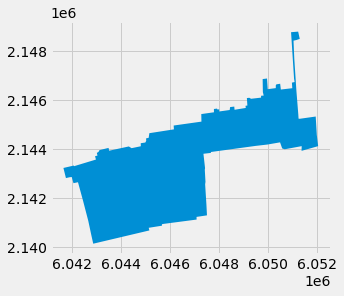

In [33]:
alameda = gpd.read_file('datasets/EBMUD_AlamedaCounty_map/ITA_20101109.shp')
alameda.plot();

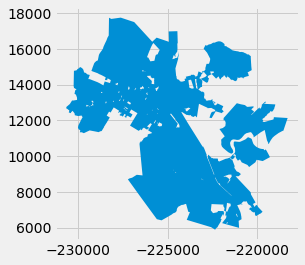

In [34]:
novato = gpd.read_file('datasets/Novato_map/Novato_Service_Area.shp')
novato.plot();

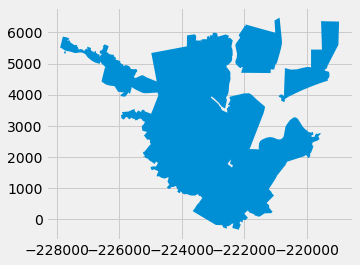

In [35]:
las_gallinas = gpd.read_file('datasets/LasGallinas_map/Las_Gallinas_Service_Area.shp')
las_gallinas.plot();

Now, let's look at their `Raw_mean` in terms of how much viral load is in the wastewater per region.

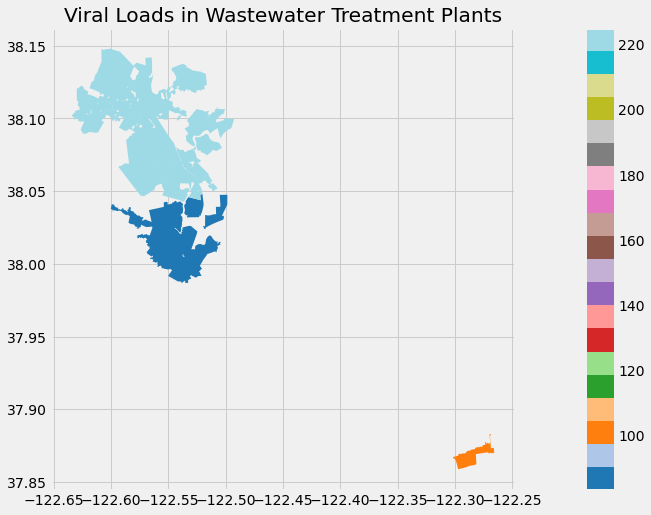

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#Don't edit the above code

covid_wastewater.plot(column="Raw_mean", ax=ax, legend = True, cax=cax, cmap = 'tab20');
ax.set_title('Viral Loads in Wastewater Treatment Plants')
plt.show()

**Rank the order of the districts from highest to lowest for the mean, median, 10th percentile, and 90th percentile.**

Hint: *Change the parameter for `column = ...` in the plot above based on what metric you are analyzing.*

> See the .shp files above to match each shape on the map to each district.

**Mean:**
1. Novato
2. Alameda
3. Las Gallinas

**Median:**
1. ***Type your answer here*** (double-click to edit)
2. 
3. 

**10th Percentile:**
1. 
2. 
3. 

**90th Percentile:**
1. 
2. 
3. 

**Question: Why is the mean *not* the best indicator of present COVID-19 RNA for this data? Thus, which metric is more indicative of highest COVID prevalence?**

***Replace this with your answer*** (double-click to edit)

### 2.3 Analysis

#### Question 1
According to the legend, how does the magnitude of a light pink-colored location compare to a dark green-colored location for any column?

***Replace this with your answer*** (double-click to edit)

#### Question 2
Without looking at the actual dataset, which location is around **370 gene copies / mL** for its 90th percentile?

***Replace this with your answer*** (double-click to edit)

#### Question 3
Which location (out of Alameda, Novato, and Las Gallinas) do you think has the highest presence of COVID-19 RNA in wastewater?

***Replace this with your answer*** (double-click to edit)

---

# 3. Wastewater Research by Dr. Kantor <a id='2'></a>


### 3.1 Introduction to Dr. Kantor's Data

On a high level, we will be using Dr. Kantor's data in order to understand how much SARS-Co-V-2 RNA there is in wastewater. We will be specifically focusing on Bay Area neighborhoods. The hope of analyzing these data is to understand why certain neighborhoods had less/more Covid-19 RNA in their wastewater - this analysis will be continued in Part 4 when we focus on overall COVID-19 rates.

### 3.2 Explatory Data Analysis (EDA)

In [37]:
wastewater_data = pd.read_csv('datasets/kantor_data.csv').drop(columns = ['site_type', 'sample_code', 'pmmov', 'pmmov_site_median', 'adjusted_pmmov'])
wastewater_data.head()

,county,site,site_population,date,sarscov2_raw,flow,flow_adjustment_ratio,industrial_adjustment_ratio,dry_median_flow
0,Marin,CMSA influent,105000,2021-08-01,16.545575,7.1200,0.945244,1.0,7.53245
1,Marin,CMSA influent,105000,2021-08-01,16.545575,7.1200,0.945244,1.0,7.53245
2,Marin,CMSA influent,105000,2021-08-03,88.889016,7.1371,0.947514,1.0,7.53245
3,Marin,CMSA influent,105000,2021-08-03,88.889016,7.1371,0.947514,1.0,7.53245
4,Marin,CMSA influent,105000,2021-08-08,35.448098,7.2466,0.962051,1.0,7.53245


**Let's see what attributes are in this table:**

In [38]:
wastewater_data.columns

Index(['county', 'site', 'site_population', 'date', 'sarscov2_raw', 'flow',
       'flow_adjustment_ratio', 'industrial_adjustment_ratio',
       'dry_median_flow'],
      dtype='object')

**Here are the descriptions for each variable:**

Variable | Description
----|----
county |  the county in which the sewershed is located
site  |  name of the sewershed sampling site
site_population | estimated population within the sewershed boundaries
date  | date that the wastewater sample was collected
sarscov2_raw | the concentration of SARS-CoV-2 RNA in the wastewater in units of gene copies per milliliter
flow | the flow rate measured at the sampling site on the date of treatment in units of million gallons per day (MGD)
flow_adjustment_ratio | the ratio by which the SARS-CoV-2 RNA was adjusted to account for flow that deviated from the baseline
industrial_adjustment_ratio | the average contribution of industrial wastewater
dry_median_flow | median flow rate for each site

#### Analysis Questions


#### Question 1
What variables would you be interested in learning more about and why?

***Replace this with your answer*** (double-click to edit)

#### Question 2
**Hypothesize:** What areas of the Bay Area do you think have more COVID-19 RNA in their wastewater and why?

***Replace this with your answer*** (double-click to edit)

### 3.3 Visualize the Data

**Let's see what counties are present in this dataset!**

Hint: Fill in the code with the county variable.

In [24]:
counties = wastewater_data[...].unique()
counties

array(['Marin', 'Alameda', 'SF'], dtype=object)

**Now that we know what counties to focus on, lets see the total population and how much total COVID-19 RNA is present in the wastewater of each county.**

In [39]:
grouped_data = wastewater_data.groupby('county').agg('sum')[['site_population', 'sarscov2_raw']].reset_index()
grouped_data

,county,site_population,sarscov2_raw
0,Alameda,173160000,23115.926865
1,Marin,40002754,90169.647621
2,SF,511747584,110626.467273


Recall that the population of the site is important to understand the significance of the amount of COVID-19 RNA present.

ie) 2000 gene copies/mL collected COVID-19 RNA in a population of 45,000,000 is not very significant at all but 2000 gene copies/mL for a population of 3000 would be very significant. Thus, scale is important.

Hence, we will plot the Concentration of Covid-19 RNA vs Population of the site (in millions) to see this visually.

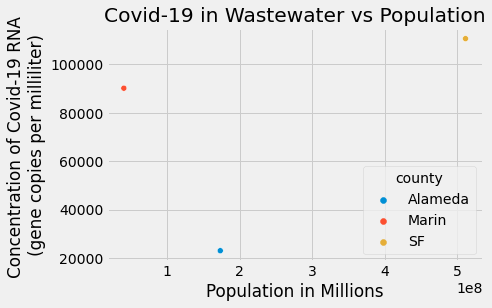

In [40]:
#plt.scatter(x=grouped_data["site_population"], y=grouped_data["sarscov2_raw"], label=grouped_data["county"])
sns.scatterplot(x=grouped_data["site_population"], y=grouped_data["sarscov2_raw"], hue=grouped_data["county"])
plt.xlabel('Population in Millions')
plt.ylabel('Concentration of Covid-19 RNA \n(gene copies per milliliter)'); 
plt.title('Covid-19 in Wastewater vs Population'); 

**Which county has the greates amount of RNA in the wastewater per capita?**

Hint: Calculate this value by dividing the number of raw RNA by population as seen below.

***Replace this with your answer*** (double-click to edit)

In [41]:
alameda = grouped_data[grouped_data['county'] == 'Alameda']
alameda_ratio = (alameda['sarscov2_raw']/alameda['site_population'])[0]
alameda_ratio

0.00013349461114087763

Complete the same calculation for Marin and SF in the following cells:

In [13]:
marin = ...
marin_ratio = ...
marin_ratio

Ellipsis

In [14]:
sf = ...
sf_ratio = ...
sf_ratio

Ellipsis

Now go back to answer the question above.

In [21]:
# You can use the max() function to compare the ratios

max(alameda_ratio, marin_ratio, sf_ratio)

### 3.4 Normalize the Data

For this next section, we will do an activity about normalizing data.
> Normalizing data essentially means adjusting values that were measured on different scales or have biases to a common scale to help more accurately interpret data.  

We will be normalizing the `sarscov2_raw` variable to account for rainfall that dilutes sewage. When it rains, some water flows into the sewer system, diluting the fecal matter in addition to SARS-Co-V-2 particles in the water. This causes the concentration of SARS-Co-V-2 to appear as a lower concentration than in reality. The way we can correct this error is by multipying the `flow_adjustment_ratio` column with the `sarscov2_raw` column since the `flow_adjustment_ratio` column accounts for this dilution. For example: On days that it rained, the flow rate is higher than on dry days.

**Make a new column called `"sarscov2_adjusted"` that is the product of `sarscov2_raw` column and `flow_adjustment_ratio` column.**

In [42]:
wastewater_data[...] = wastewater_data[...] * wastewater_data[...]
wastewater_data.head(3)

#You should now be able to see your sarscov2_adjusted column in the wastewater_data DataFrame

,county,site,site_population,date,sarscov2_raw,flow,flow_adjustment_ratio,industrial_adjustment_ratio,dry_median_flow,sarscov2_adjusted
0,Marin,CMSA influent,105000,2021-08-01,16.545575,7.1200,0.945244,1.0,7.53245,15.639599
1,Marin,CMSA influent,105000,2021-08-01,16.545575,7.1200,0.945244,1.0,7.53245,15.639599
2,Marin,CMSA influent,105000,2021-08-03,88.889016,7.1371,0.947514,1.0,7.53245,84.223566


**Now let's plot the original vs adjusted values.**

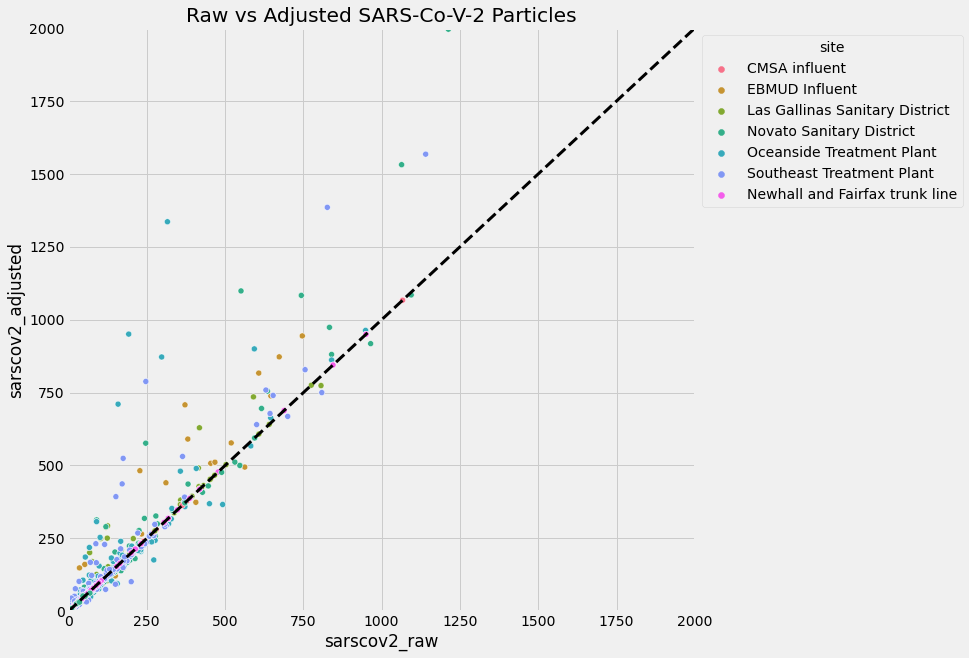

In [49]:
fig,ax = plt.subplots(figsize = (10, 10))
plt.xlim(right = 2000)
plt.ylim(top = 2000)
raw_vs_adj = sns.scatterplot(data = wastewater_data, x = 'sarscov2_raw', y = 'sarscov2_adjusted', hue = 'site')
sns.move_legend(raw_vs_adj, "upper left", bbox_to_anchor=(1, 1))

# Let's also plot a y = x line for reference
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.title('Raw vs Adjusted SARS-Co-V-2 Particles'); 

#### Question

**How did normalizing the data affect the amount of SARS-Co-V-2 Particles? Was the raw data typically an underestimate, overestimate, or other?**

***Replace this with your answer*** (double-click to edit)

---

# 4. COVID-19 Data  <a id='3'></a>


### 4.1  San Francisco COVID-19 Cases

We are going to be looking at the following dataset from [SF gov on COVID 19 case maps](https://sf.gov/data/covid-19-case-maps). Look through the two visualizations and notice the different counties with different COVID-19 case levels.

**Click on the link above. Based on the *second* visualization (the `Total Cases Map`) which neighborhood in SF had the highest case rate?**

***Replace this with your answer*** (double-click to edit)

Now we're going to import our dataset! This time, we will be using a special type of library known as `GeoPandas`, intended to make working with geospatial data much easier than it would have been in Pandas. We'll first import in our `csv` file, which can be read in as a Pandas DataFrame. Note that the `sfcovid.shp` file is a `Shapefile`, and thus should be read in Geopandas.

In [3]:
sf_covid_data = pd.read_csv("datasets/sf_covid_by_geo.csv")

In [4]:
sf_covid_data.head()

,area_type,id,count,count_last_60_days,rate,deaths,acs_population,max_specimen_collection_date,last_updated_at,data_loaded_at,multipolygon
0,Analysis Neighborhood,Bayview Hunters Point,13532.0,271.0,3568.847746,74.0,37917,2022/11/03 12:00:00 AM,2022/11/08 04:30:01 AM,2022/11/08 05:00:15 AM,MULTIPOLYGON (((-122.39356284899998 37.7084013...
1,Analysis Neighborhood,Bernal Heights,5259.0,172.0,2089.641197,27.0,25167,2022/11/03 12:00:00 AM,2022/11/08 04:30:01 AM,2022/11/08 05:00:14 AM,MULTIPOLYGON (((-122.40361299982806 37.7493370...
2,Analysis Neighborhood,Castro/Upper Market,3634.0,77.0,1614.967558,21.0,22502,2022/11/03 12:00:00 AM,2022/11/08 04:30:01 AM,2022/11/08 05:00:14 AM,MULTIPOLYGON (((-122.42655500055685 37.7694849...
3,Analysis Neighborhood,Chinatown,2182.0,72.0,1511.289652,50.0,14438,2022/11/03 12:00:00 AM,2022/11/08 04:30:01 AM,2022/11/08 05:00:14 AM,MULTIPOLYGON (((-122.4062259995664 37.79755900...
4,Analysis Neighborhood,Excelsior,10056.0,247.0,2521.627924,87.0,39879,2022/11/03 12:00:00 AM,2022/11/08 04:30:01 AM,2022/11/08 05:00:14 AM,MULTIPOLYGON (((-122.4249859998036 37.73156000...


Now we'll dive into the **granularity** of the data. When we ask you to define the granularity of a dataset, we refer to what each row represents. This is a different definition than you may be used to in Civil Engineering, as here the definition of Data Granularity is "a measure of the level of detail in a data structure". For instance, if I had a dataset full of the heights of every single UC Berkeley student in feet, then the granularity of that dataset would be that each row represents the height in feet of all UC Berkeley students.

**Let's put this back into the context of today's notebook. What is the granularity of the `sf_covid_data` DataFrame?** (See the .csv file)

***Replace this with your answer*** (double-click to edit)

Now we're going to read in our ShapeFile. Note that we use the notation `gpd.read_file(file-name)` because we imported Geopandas as gpd all the way when we first imported libraries.

**COVID-19 `rate` by Region of San Francisco**

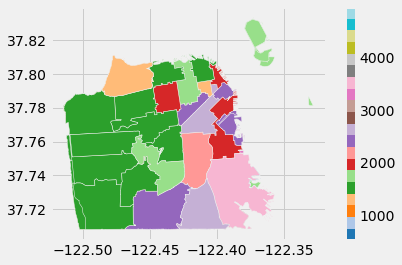

In [25]:
sf_covid_map = gpd.read_file("datasets/sf_covid_by_geo/sfcovid.shp")
sf_covid_map.plot(column = 'rate', legend = True, cmap = 'tab20');

**Color-Coded Map of the Neighborhoods of San Francisco** 

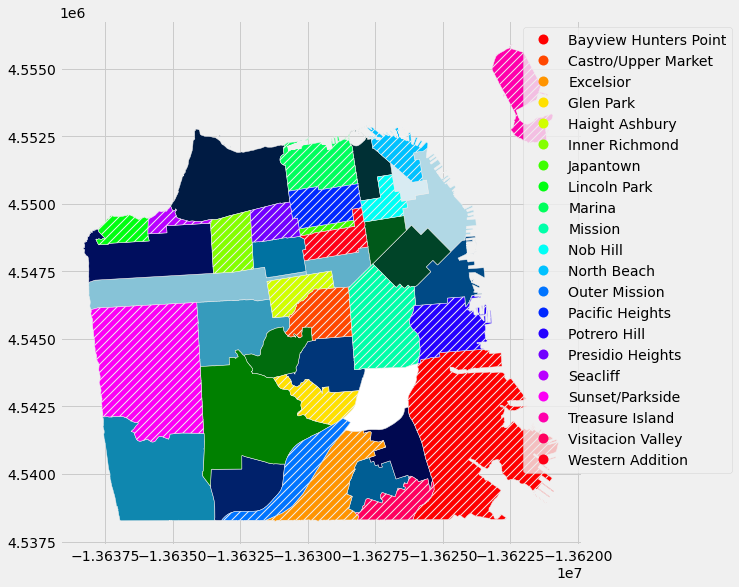

In [72]:
neighborhoods = sf_covid_map[sf_covid_map['area_type'] == 'Analysis Neighborhood']
odds = neighborhoods.iloc[1 ::2]
evens = neighborhoods.iloc[::2]
fig, ax = plt.subplots(1,1,figsize=(9,9))

odds.to_crs(epsg=3857).plot(column='id', ax=ax, cmap= 'ocean_r',legend=True, legend_kwds={'bbox_to_anchor': (1.3, 1)})
evens.to_crs(epsg=3857).plot(column='id', ax=ax, cmap= 'hsv',hatch = '///', legend=True, legend_kwds={'bbox_to_anchor': (1.3, 1)})

plt.show()

The legend on the right includes the names of the neighborhoods with hatching (///). ie) Bayview Hunters Point is the large red hatched neighborhood in the bottom right corner of the geoplot. 

#### Analysis Question
**In the neighborhood map, locate Southeast San Francisco. Some of the neighborhoods include Bayview Hunters Point, Glen Park, and Visitacion Valley. How does this region's number of Total COVID-19 Cases compare to other areas of San Francisco?**

***Replace this with your answer*** (double-click to edit)

### 4.2  Understanding Visual Representations of Data

In this sub-section, we will be looking back at the visualizations on the [SF.gov website](https://sf.gov/data/covid-19-case-maps). Open it up again and skim through the page before answering the following questions.

#### Analysis Questions
**In both the visualizations, what does the `legend` represent?**

***Replace this with your answer*** (double-click to edit)

**Notice how the visualization is graphed by the case rate, not the total cases. Why is this a *good choice*?**

***Replace this with your answer*** (double-click to edit)

**Identify the neighborhood where there was a *New Case Rate* of 85.**

***Replace this with your answer*** (double-click to edit)

### 4.3 Structural Inequality

#### Please read the last section in the [SF Government COVID-19 case map page](https://sf.gov/data/covid-19-case-maps) about institutional racism and structural inequality before answering the following questions.

**In at least two sentences, list the *three ways* outlined in which structural racism and discrimination impact lives that can affect one's health as well. Can these factors target specific low income or communities of color more than other groups?**

***Replace this with your answer*** (double-click to edit)

**Now go back to the map visualization. In at least two sentences, draw inferences about what's specifically going on in SF by looking at the map. Feel free to reference the [data's population characteristics](https://sf.gov/data/covid-19-population-characteristics) as well to construct your response, although not required!**

***Replace this with your answer*** (double-click to edit)

---

# 5. Pollution Burden Maps  <a id='4'></a>


### 5.1 Data Source

For this portion of the notebook, we will be exploring the CalEnviroScreen provided by the Office of Environmental Health Hazard Assessment (OEHHA). 

The CalEnviroScreen allows us to identify California communities that are disproportionately burdeneded by different sources of pollution. 

> **Here is the link to the website: https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40**

Feel free to play around with it!

### 5.2 Interactive Map

Let's explore some of the maps together. Scroll down to the **Mapping Tools** section, locate the second graph titled `Map of CalEnviroScreen 4.0 Indicators`, then click `open a new window` for the second graph.

Once you able the new tab, exit out of the legend and click on the map to get started. The first view of the map is the Southern California, so **scroll up to the Bay Area**! Your map should end up looking like the one displayed in the cell below.

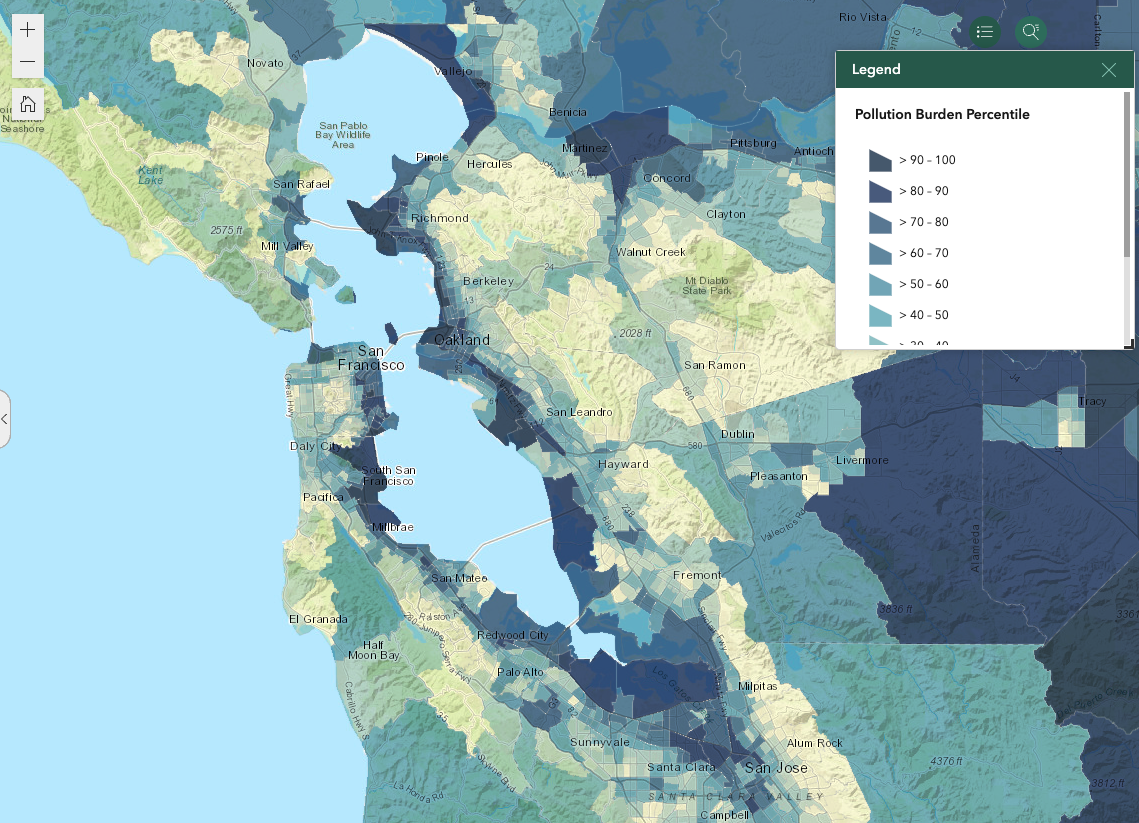

In [26]:
display.Image("images/calenviroscreen.png")

#### Questions for Understanding

**What does the darkest blue color mean on the legend? What areas near Berkeley are labeled with this color?**

***Replace this with your answer*** (double-click to edit)

>**Now let's learn a little bit more about poverty in the Bay Area. To view the poverty map, on the left side of your screen under `Population Characteristics` click `Poverty`.** Your map should now look purple.

**How does the U.S. Census Bureau determine poverty level?** (Hint: Utilize the pop-up that appears when you open the poverty map.)

***Replace this with your answer*** (double-click to edit)

**What is the poverty percentile near UC Berkeley's campus, in South San Francisco, and in West Oakland?**

**Near UC Berkeley:**  ***Replace this with your answer*** (double-click to edit)


**South SF:**

**West Oakland:**


### 5.3 Exercise
Let's download some data, and do some analysis! 

Scroll all the way down on the [original page](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), until you see a `Downloads` table that looks like this:

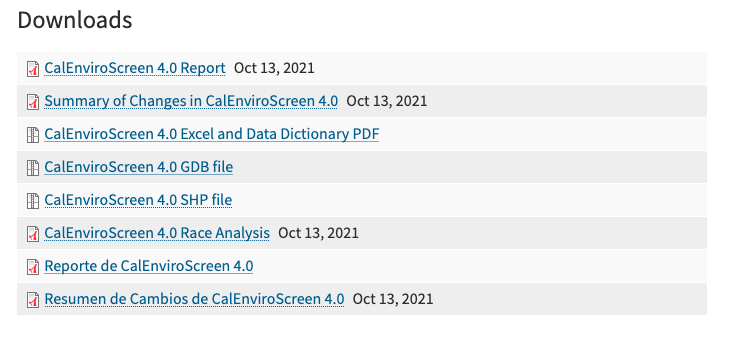

In [27]:
display.Image("images/downloads.png")

**Download the `SHP file`**

When you download the file, it will be a .zip file. Upon clicking on it/opening it, you now have a folder called "calenviroscreen40shpf2021shp". Upload the contents of this folder in the `calenviroscreen` folder within the `datasets` folder. The `calenviroscreen` folder will be empty until you locate it and add files.

For our analysis, we will be working with the `CES4 Final Shapefile.shp` file within the `calenviroscreen` folder.

Now, read in the dataset using geopandas to get started.

In [29]:
calenviroscreen = gpd.read_file('datasets/calenviroscreen/CES4 Final Shapefile.shp')
calenviroscreen.head(5)

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


If the above file is erroring, you haven't imported your file correctly. Your folders should now look like this. Remember to upload *all* files in the folder.

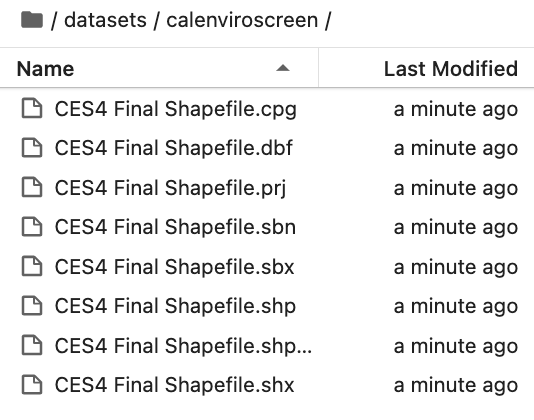

In [31]:
display.Image("images/upload.png")

### 5.4 Truncating the Axis
We are now going to truncate the axes. This means not beginning the y-axis at 0, but rather at another number. *How could this be helpful?* Let's say we had a case where we had data with a range from 50,000 to 60,000. It would make sense to begin much closer to 50,000 or we would see nothing!

**Define an example where truncating the y-axis would be essential.**

***Replace this with your answer*** (double-click to edit)

Truncating the y-axis is simple. In Pandas, before generating your visualization, simply add the argument `ylim=(0.7, 1)` - *in this case, the y-axis would go from 0.7 to 0.1* within our plotting argument. If we were to run `df.plot()`, we would simply add `df.plot(ylim=(0.7, 1))` in as an argument!

However, in GeoPandas, we have a `shapefile`, which means that plotting occurs much differently. In our case, we want to truncate the axis such that we only see counties from the San Francisco Bay Area. We would need to find a way to filter out the DataFrame to only give us DataFrame values from the Bay Area.

Scroll up above and look at our `calenviroscreen` DataFrame's columns.

**How can we filter this table such that we only have entries that are in the San Francisco Bay Area?**

***Replace this with your answer*** (double-click to edit)

If you said filtering based on counties, you're correct! Run the cell below, these are all the counties included in the `calenviroscreen` DataFrame.

In [4]:
calenviroscreen["County"].unique()

array(['Santa Barbara', 'Colusa', 'Tehama', 'Imperial', 'Monterey',
       'Amador', 'Placer', 'Calaveras', 'Mono', 'Orange', 'Santa Clara',
       'Sonoma', 'Siskiyou', 'Kern', 'Yolo', 'Sacramento', 'Madera',
       'Mendocino', 'Tulare', 'Yuba', 'San Diego', 'Plumas', 'Stanislaus',
       'San Benito', 'Shasta', 'Fresno', 'Marin', 'Mariposa', 'Alpine',
       'Glenn', 'Lassen', 'Del Norte', 'San Mateo', 'San Luis Obispo',
       'Napa', 'San Joaquin', 'Nevada', 'San Bernardino', 'Riverside',
       'Sutter', 'Trinity', 'Contra Costa', 'Ventura', 'El Dorado',
       'Tuolumne', 'Sierra', 'Lake', 'Butte', 'Modoc', 'Alameda',
       'San Francisco', 'Santa Cruz', 'Merced', 'Inyo', 'Solano', 'Kings',
       'Humboldt', 'Los Angeles'], dtype=object)

**Use outside sources to find out which California counties belong to the San Francisco Bay Area and fill in the list `bay_area_counties` with *strings* of names of the San Francisco Bay Area counties. The first county belonging to the San Francisco Bay Area, San Francisco, has been filled out for you.**

In [11]:
bay_area_counties = ["San Francisco", ...] # Replace the ellipsis with your answer! (double-click to edit)

SyntaxError: invalid syntax (1564272690.py, line 1)

Once you've filled out the cell above, run the cell below to create the `calenviroscreen_bayarea` table, which is the filtered table.

In [5]:
calenviroscreen_bayarea = calenviroscreen[calenviroscreen["County"].isin(bay_area_counties)]
calenviroscreen_bayarea.head(5)

NameError: name 'calenviroscreen' is not defined

Now we can plot our San Francisco Bay Area dataset. Check it out!

<AxesSubplot:>

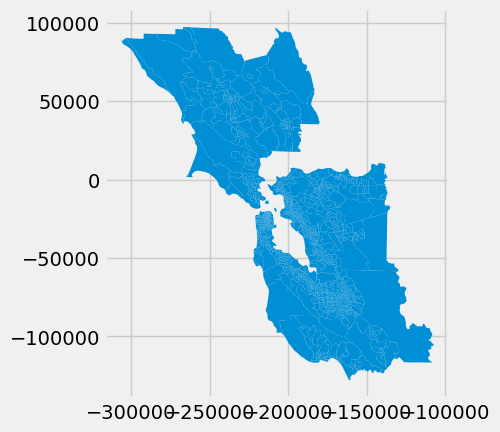

In [12]:
calenviroscreen_bayarea.plot(); 

### 5.5 Drawing Connections with Data

Open up the interactive visualization, the [CalEnviroScreen 4.0 Indicator Maps](https://experience.arcgis.com/experience/ed5953d89038431dbf4f22ab9abfe40d/page/Indicators/?views=Poverty) here (be sure to zoom into San Francisco on the map, and verify that we are looking at the Poverty population characteristic) and also the visualization on [SF covid data](https://sf.gov/data/covid-19-case-maps) from before. We will be looking at both visualizations side to side in our analysis.

**Compare and contrast the hotspots for the poverty demographics versus the SF COVID-19 new cases map scores.**

***Replace this with your answer*** (double-click to edit)

**In Section 4.3, we discussed structural inequality and how it may have impacted whether or not certain populations could have been prone to getting COVID-19. Based on the similarities and/or differences you drew in the previous question, how may poverty be related to the prevalence of COVID-19 in SF communities?**

***Replace this with your answer*** (double-click to edit)

### 5.6 Analysis

**In the sub-section above, we used two different visualizations and data values as a whole to make connections. How can connecting visualizations and data guide us in data analysis, and what further analysis can we make with the SF COVID-19 map or the CalEnviroScreen Map?**

***Replace this with your answer*** (double-click to edit)

<br><br>
# 6. Conclusion  <a id='5'></a>

**Congratulations on finishing the notebook!** There was a lot of content but here's what you learned throughout this notebook:
- Imported and manipulated `.shp` files.
- Explored and analyzed maps of viral loads in wastewater treatment plants across the Bay Area with `.shp` files.
- Performed EDA on Dr. Kantor's wastewater dataset and processed various attributes of the data.
- Explored and visualized the correlation between pollution, COVID-19, and poverty through maps from CalEnvironScreen.

### Written Response



**How can we use data visualization and mapping to actualize and solve real-world inequities?**

***Replace this with your answer*** (double-click to edit)


# 7. Submitting Your Work  <a id='6'></a>


You are now finished with this notebook!

1. **Make sure that you've answered all the questions.**
2. Click **File** then **Save Notebook**.
3. Click **Run** then **Run All Cells**. During this step you'll notice if any cells are producing errors.
4. Click **File** then **Save and Export As** then **PDF**. 
5. The file will now be saved as a pdf in your downloads. **Upload the PDF** of your notebook according to your professor's instrucions. 

<br><br>
# 8. Explore Data Science Opportunities  <a id='7'></a>

Interested in learning more about how to get involved in data science or learn about data science applications in Civil Engineering? The following resources might help support your learning:

---

- Data Science Modules: http://data.berkeley.edu/education/modules

- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings
- Data Science for Smart Cities (CIVENG 88); offered in Spring 2023, 2 units: https://classes.berkeley.edu/content/2023-spring-civeng-c88-001-lec-001

- Data 8 Course Information: http://data8.org/

- Data 100 Course Information: https://ds100.org/


# 9. Feedback Form <a id='8'></a>

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)